In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('original_dataset.csv', sep = ';')
df.shape

(165633, 19)

### Introduction of roll, pitch and module parameters for each accelerometer

In [20]:
df['roll1'] = pd.Series(180/np.pi*(np.arctan2(df['y1'], df['z1'])))
df['pitch1'] = pd.Series(180/np.pi*(np.arctan2(-df['x1'], np.sqrt(np.power(df['y1'], 2) + np.power(df['z1'], 2)))))
df['accel1'] = pd.Series(np.sqrt(np.power(df['x1'], 2) + np.power(df['y1'], 2) + np.power(df['z1'], 2)))

df['roll2'] = pd.Series(180/np.pi*(np.arctan2(df['y2'], df['z2'])))
df['pitch2'] = pd.Series(180/np.pi*(np.arctan2(-df['x2'], np.sqrt(np.power(df['y2'], 2) + np.power(df['z2'], 2)))))
df['accel2'] = pd.Series(np.sqrt(np.power(df['x2'], 2) + np.power(df['y2'], 2) + np.power(df['z2'], 2)))

df['roll3'] = pd.Series(180/np.pi*(np.arctan2(df['y3'], df['z3'])))
df['pitch3'] = pd.Series(180/np.pi*(np.arctan2(-df['x3'], np.sqrt(np.power(df['y3'], 2) + np.power(df['z3'], 2)))))
df['accel3'] = pd.Series(np.sqrt(np.power(df['x3'], 2) + np.power(df['y3'], 2) + np.power(df['z3'], 2)))

df['roll4'] = pd.Series(180/np.pi*(np.arctan2(df['y4'], df['z4'])))
df['pitch4'] = pd.Series(180/np.pi*(np.arctan2(-df['x4'], np.sqrt(np.power(df['y4'], 2) + np.power(df['z4'], 2)))))
df['accel4'] = pd.Series(np.sqrt(np.power(df['x4'], 2) + np.power(df['y4'], 2) + np.power(df['z4'], 2)))

df.head(1)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,...,accel1,roll2,pitch2,accel2,roll3,pitch3,accel3,roll4,pitch4,accel4
0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,-23,...,111.543713,136.548158,41.308515,34.842503,131.496468,-2.062298,138.942434,-144.981829,39.884957,233.918789


### Write file with variances and modules

In [21]:
df.to_csv('measure_dataset.csv', sep = ';', index=False)

In [22]:
avg_df = pd.read_csv('measure_dataset.csv', sep = ';')
avg_df.shape

(165633, 31)

### Given 8 row calculate mean and std for the roll, pitch and module parameters

In [6]:
def make_mean_variance(dataframe):
    new_row = {}
    
    for field in ['user', 'gender', 'age', 'how_tall_in_meters', 'weight', 'body_mass_index', 'class']:
        new_row[field] = dataframe[field].iloc[0]
    
    for field in ['roll1', 'pitch1', 'roll2', 'pitch2', 'roll3', 'pitch3','roll4', 'pitch4']:
        new_row[field] = np.var(dataframe[field])
        
    for i in range (1, 5):
        x_list = dataframe[f'x{i}']
        y_list = dataframe[f'y{i}']
        z_list = dataframe[f'z{i}']
        x = x_list.sum()
        y = y_list.sum()
        z = z_list.sum()

        new_row[str(f'accel{i}')] = np.sqrt(np.power(x, 2) + np.power(y, 2) + np.power(z, 2))/x_list.shape[0]
    
    return new_row

### Mean and std on 8 subsequent rows on roll, pitch e module parameters of every accelerometer. Dataframe has been splitted by class and by user

In [7]:
avg_df = pd.DataFrame()

for class_action in df['class'].unique():
    class_df = df.loc[df['class'] == class_action]
    
    for user in class_df['user'].unique():
        class_user_df = class_df.loc[class_df['user'] == user]
        n_instance = class_user_df.shape[0]
        
        for i in range(int(np.ceil(n_instance/7))):
            avg_df = avg_df.append(make_mean_variance(class_user_df[i*7:min((i+1)*7+1, n_instance)]), ignore_index=True)

avg_df.head(1)

,accel1,accel2,accel3,accel4,age,body_mass_index,class,gender,how_tall_in_meters,pitch1,pitch2,pitch3,pitch4,roll1,roll2,roll3,roll4,user,weight
0,113.982044,29.443006,137.710577,232.960733,46.0,"28,6",sitting,Woman,"1,62",0.383252,39.775099,6.15684,0.194032,1.342097,27.098406,0.122373,0.134424,debora,75.0


In [8]:
avg_df.to_csv('row_dataset.csv', sep = ';', index=False)

In [9]:
avg_df = pd.read_csv('row_dataset.csv', sep = ';')
avg_df.shape

(23668, 19)

#### Remove of x, y, z parameters for each accelerometer

In [23]:
avg_df = avg_df.drop(labels = ['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', \
                               'x4', 'y4', 'z4'], axis = 1)

avg_df.head(1)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,class,roll1,pitch1,accel1,roll2,pitch2,accel2,roll3,pitch3,accel3,roll4,pitch4,accel4
0,debora,Woman,46,"1,62",75,"28,6",sitting,124.402665,1.541172,111.543713,136.548158,41.308515,34.842503,131.496468,-2.062298,138.942434,-144.981829,39.884957,233.918789


### Splitting class in 5 variables

In [24]:
for class_action in avg_df['class'].unique():
    avg_df[class_action] = 0

for i in range(avg_df.shape[0]):
    class_action = avg_df.iloc[i]['class']
    if class_action == 'sitting':
        avg_df.loc[i, 'sitting'] = 1
    elif class_action == 'sittingdown':
        avg_df.loc[i, 'sittingdown'] = 1
    elif class_action == 'standing':
        avg_df.loc[i, 'standing'] = 1
    elif class_action == 'standingup':
        avg_df.loc[i, 'standingup'] = 1
    else:
        avg_df.loc[i, 'walking'] = 1 
    
avg_df.head(1)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,class,roll1,pitch1,accel1,...,pitch3,accel3,roll4,pitch4,accel4,sitting,sittingdown,standing,standingup,walking
0,debora,Woman,46,"1,62",75,"28,6",sitting,124.402665,1.541172,111.543713,...,-2.062298,138.942434,-144.981829,39.884957,233.918789,1,0,0,0,0


### Discretization acceleration 

In [25]:
n_bins = 10

for acceleration in ['accel1', 'accel2', 'accel3', 'accel4']:
    avg_df[f'{acceleration}_disc'] = pd.Series(pd.cut(avg_df[acceleration], n_bins, \
                                              labels=list(range(n_bins))))

avg_df.head(1)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,class,roll1,pitch1,accel1,...,accel4,sitting,sittingdown,standing,standingup,walking,accel1_disc,accel2_disc,accel3_disc,accel4_disc
0,debora,Woman,46,"1,62",75,"28,6",sitting,124.402665,1.541172,111.543713,...,233.918789,1,0,0,0,0,1,0,1,1


### Mean and std of acceleration_module

In [26]:
avg_df['accel_mean'] = (avg_df['accel1'] + avg_df['accel2'] + \
                        avg_df['accel3'] + avg_df['accel4']) /4

accel_std = [np.std([avg_df['accel1'].iloc[i], avg_df['accel2'].iloc[i], \
                        avg_df['accel3'].iloc[i], avg_df['accel4'].iloc[i]]) for i in range(avg_df.shape[0])]
avg_df['accel_std'] = pd.Series(accel_std)
    
avg_df.head(1)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,class,roll1,pitch1,accel1,...,sittingdown,standing,standingup,walking,accel1_disc,accel2_disc,accel3_disc,accel4_disc,accel_mean,accel_std
0,debora,Woman,46,"1,62",75,"28,6",sitting,124.402665,1.541172,111.543713,...,0,0,0,0,1,0,1,1,129.81186,71.194319


### Write the final continuos dataframe

In [27]:
avg_df.to_csv('continuos_dataset.csv', sep = ';', index=False)

In [45]:
avg_df = pd.read_csv('continuos_dataset.csv', sep = ';')
avg_df.shape

(165633, 30)

### Discretization all 

In [46]:
n_bins = 10
fields = ['pitch1', 'pitch2', 'pitch3', 'pitch4', 'roll1', 'roll2', 'roll3', 'roll4', \
              'accel1', 'accel2', 'accel3', 'accel4', 'accel_mean', 'accel_std']

for field in fields:
    avg_df[f'{field}_disc'] = pd.Series(pd.cut(avg_df[field], n_bins, \
                                              labels=list(range(n_bins))))

avg_df.head(1)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,class,roll1,pitch1,accel1,...,pitch1_disc,pitch2_disc,pitch3_disc,pitch4_disc,roll1_disc,roll2_disc,roll3_disc,roll4_disc,accel_mean_disc,accel_std_disc
0,debora,Woman,46,"1,62",75,"28,6",sitting,124.402665,1.541172,111.543713,...,3,7,4,4,8,8,8,0,0,1


### Write the final discrete dataframe

In [47]:
avg_df.to_csv('discrete_dataset.csv', sep = ';', index=False)

In [48]:
avg_df = pd.read_csv('discrete_dataset.csv', sep = ';')
avg_df.shape

(165633, 40)

### Plot variances and module by class with mean

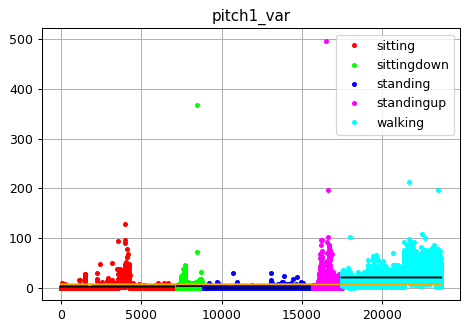

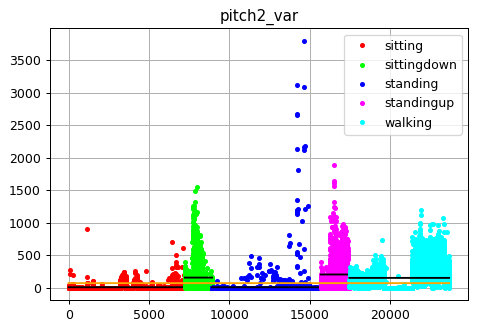

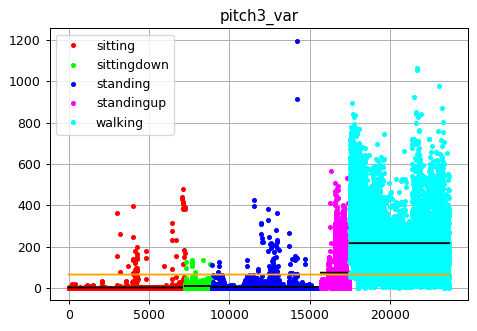

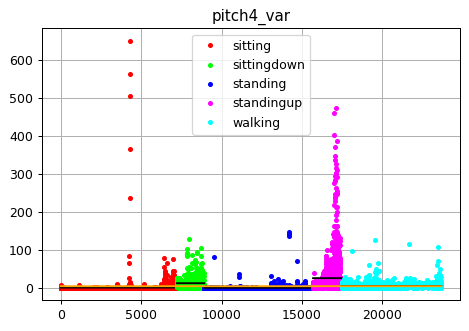

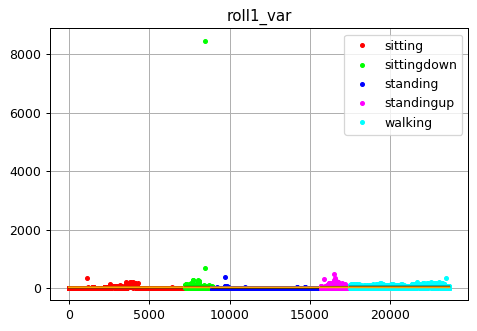

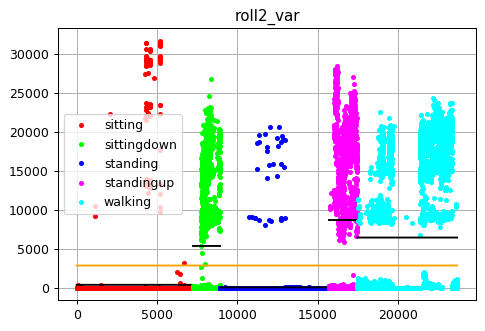

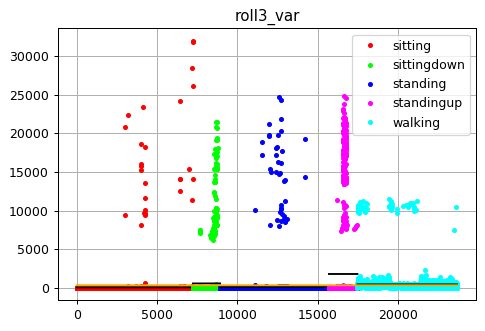

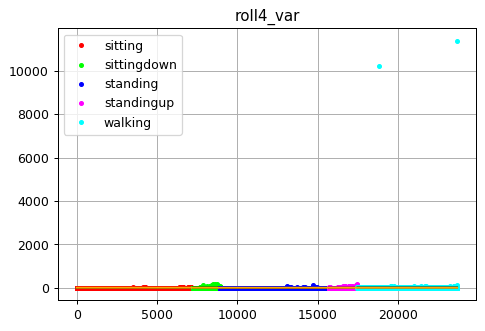

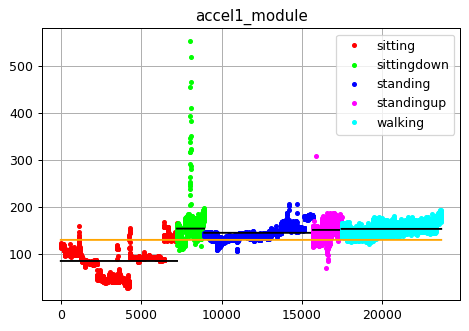

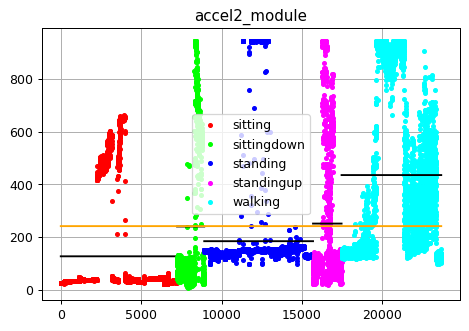

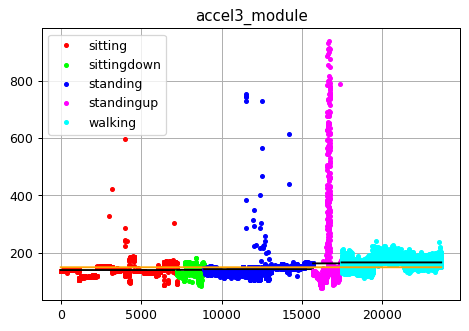

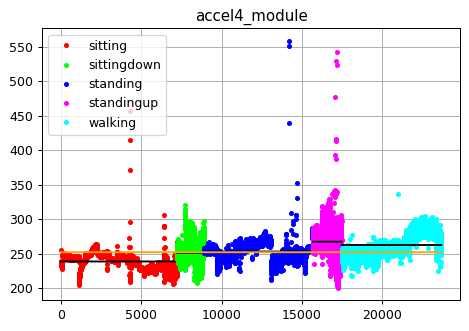

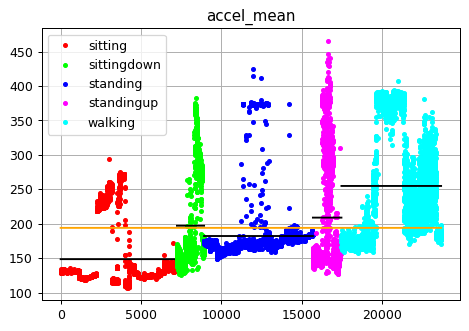

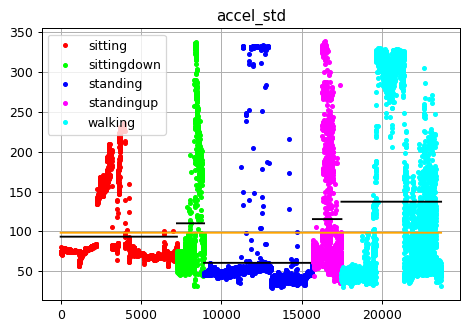

In [22]:
# Plot continuos

colors = ['#ff0000', '#00ff00', '#0000ff', '#ff00ff', '#00ffff']

for field in ['pitch1_var', 'pitch2_var', 'pitch3_var', 'pitch4_var', \
              'roll1_var', 'roll2_var', 'roll3_var', 'roll4_var', \
              'accel1_module', 'accel2_module', 'accel3_module', 'accel4_module', \
              'accel_mean', 'accel_std']:
    
    legend = []
    labels = []
    start_position = 0
    mean = np.mean(avg_df[field])
    for k, class_action in enumerate(avg_df['class'].unique()):
        class_df = avg_df.loc[avg_df['class'] == class_action]
        class_mean = np.mean(class_df[field])
        field_by_class = class_df[field]
        positions = list(range(start_position, start_position + (len(field_by_class))))
        legend.append(plt.plot(positions, field_by_class, color = colors[k], linestyle = ' ', marker = '.')[0])
        plt.plot(positions, [class_mean]*len(positions), color = 'black')
        start_position += len(field_by_class)
        labels.append(class_action)
    plt.plot(list(range(len(avg_df))), [mean]*len(avg_df), color = 'orange')
    
    plt.grid(True)
    #plt.yscale('log')
    plt.title(field)
    plt.legend(legend, labels)
    plt.savefig(f'graphs/{field}.png', dpi = 180)
    plt.show()

In [23]:
# Print continuos mean

for field in ['pitch1_var', 'pitch2_var', 'pitch3_var', 'pitch4_var', \
              'roll1_var', 'roll2_var', 'roll3_var', 'roll4_var', \
              'accel1_module', 'accel2_module', 'accel3_module', 'accel4_module', \
              'accel_mean', 'accel_std']:
    
    print(f"\n{field} \t{avg_df[field].mean()}")
    for class_action in avg_df['class'].unique():
        class_df = avg_df.loc[avg_df['class'] == class_action]
        print(f"{class_action} \t{class_df[field].mean()}")


pitch1_var 	7.349272644819336
sitting 	2.718287002937523
sittingdown 	3.8523983584812194
standing 	0.5543297243576812
standingup 	7.870737299738426
walking 	20.97502047440127

pitch2_var 	73.20671665682613
sitting 	10.445893148896493
sittingdown 	158.25750472737693
standing 	10.441391952557876
standingup 	206.05309657544763
walking 	153.74415600920855

pitch3_var 	64.64686543283902
sitting 	2.1859625675544905
sittingdown 	9.051026950359622
standing 	3.950597127017272
standingup 	73.514176241499
walking 	216.40697863277364

pitch4_var 	4.460439259857892
sitting 	0.8822758943722795
sittingdown 	12.364031667367659
standing 	0.3262657529723634
standingup 	25.63042893790671
walking 	4.93380238998739

roll1_var 	20.34270299778265
sitting 	11.90914098533391
sittingdown 	37.01414285218017
standing 	0.9934144235140006
standingup 	34.2986029648206
walking 	42.76806850775917

roll2_var 	2872.8100518542115
sitting 	394.8762228282967
sittingdown 	5382.6337406463845
standing 	74.71842231505778
stan

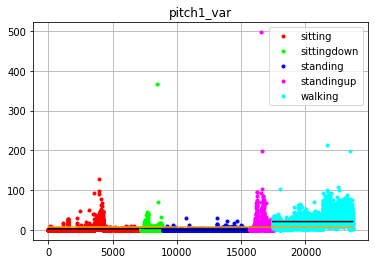

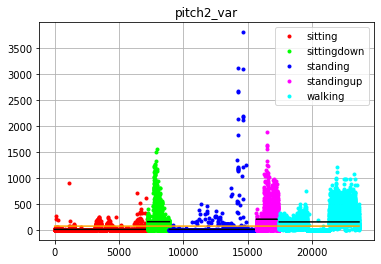

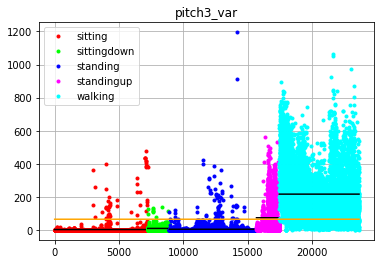

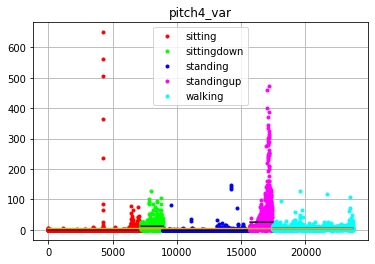

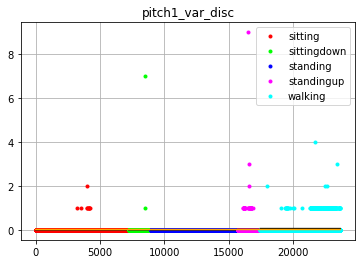

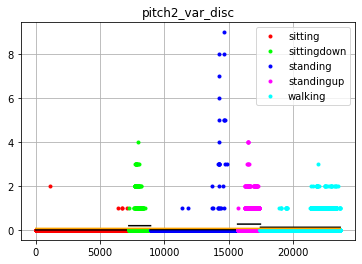

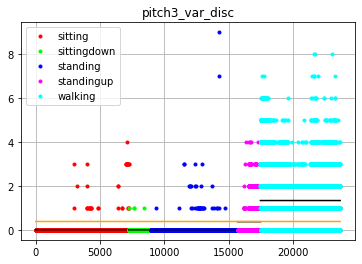

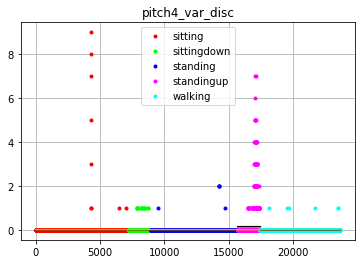

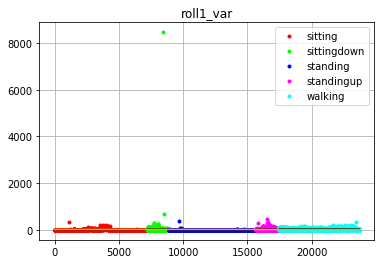

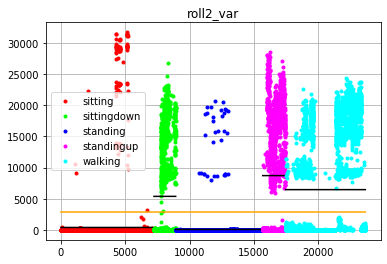

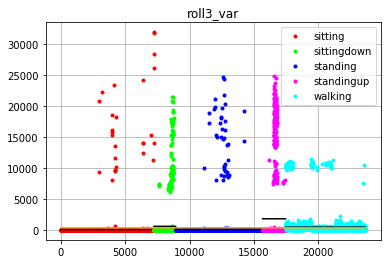

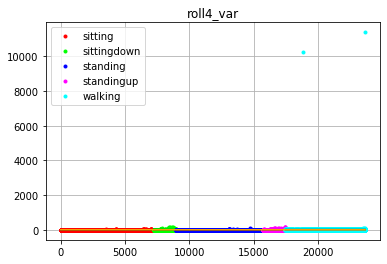

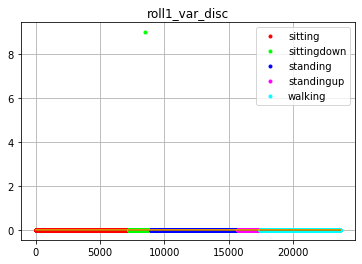

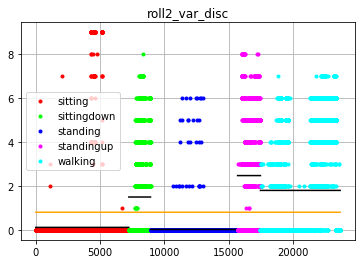

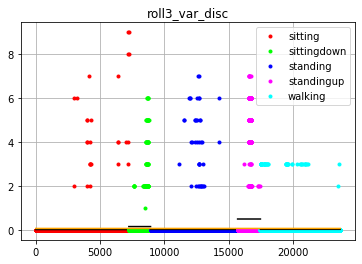

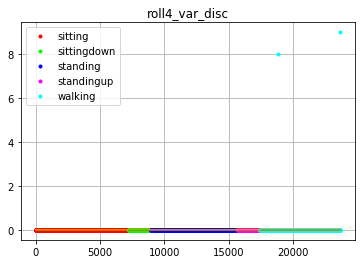

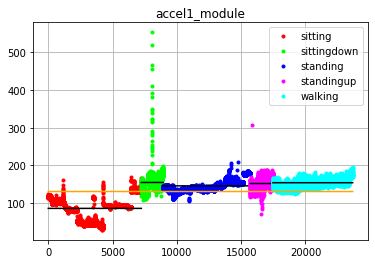

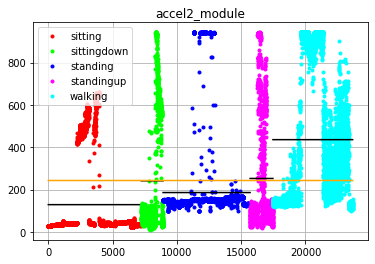

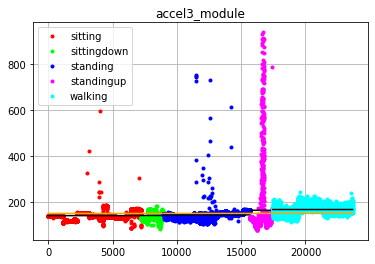

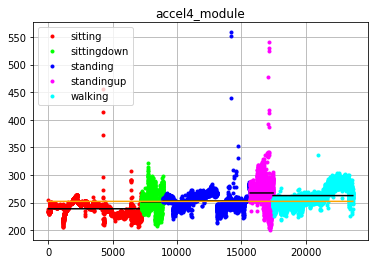

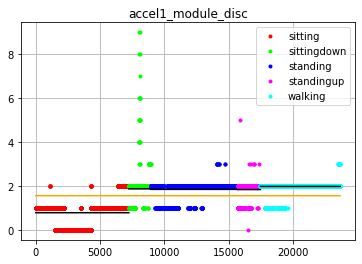

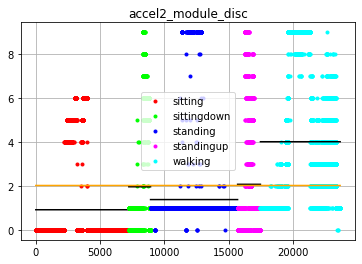

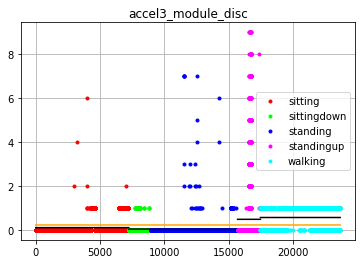

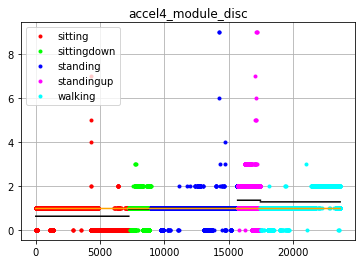

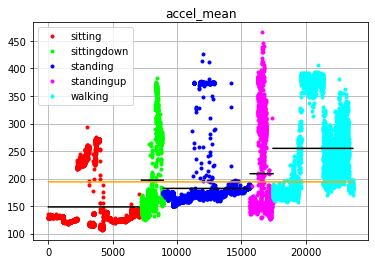

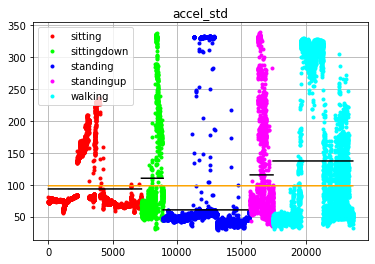

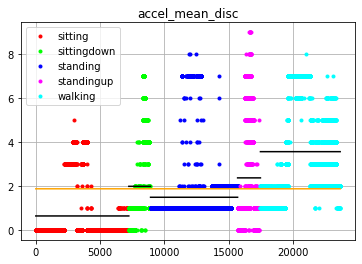

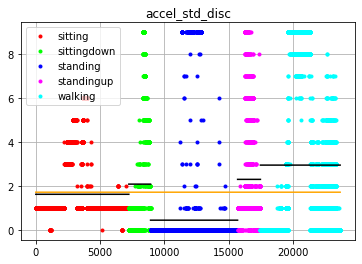

In [7]:
# Plot continuos and discrete

colors = ['#ff0000', '#00ff00', '#0000ff', '#ff00ff', '#00ffff']

for field in ['pitch1_var', 'pitch2_var', 'pitch3_var', 'pitch4_var', \
              'pitch1_var_disc', 'pitch2_var_disc', 'pitch3_var_disc', 'pitch4_var_disc', \
              'roll1_var', 'roll2_var', 'roll3_var', 'roll4_var', \
              'roll1_var_disc', 'roll2_var_disc', 'roll3_var_disc', 'roll4_var_disc', \
              'accel1_module', 'accel2_module', 'accel3_module', 'accel4_module', \
              'accel1_module_disc', 'accel2_module_disc', 'accel3_module_disc', 'accel4_module_disc', \
              'accel_mean', 'accel_std', 'accel_mean_disc', 'accel_std_disc']:
    
    legend = []
    labels = []
    start_position = 0
    mean = np.mean(avg_df[field])
    for k, class_action in enumerate(avg_df['class'].unique()):
        class_df = avg_df.loc[avg_df['class'] == class_action]
        class_mean = np.mean(class_df[field])
        field_by_class = class_df[field]
        positions = list(range(start_position, start_position + (len(field_by_class))))
        legend.append(plt.plot(positions, field_by_class, color = colors[k], linestyle = ' ', marker = '.')[0])
        plt.plot(positions, [class_mean]*len(positions), color = 'black')
        start_position += len(field_by_class)
        labels.append(class_action)
    plt.plot(list(range(len(avg_df))), [mean]*len(avg_df), color = 'orange')
    
    plt.grid(True)
    #plt.yscale('log')
    plt.title(field)
    plt.legend(legend, labels)
    plt.savefig(f'graphs/{field}.png', dpi = 180)
    plt.show()

In [8]:
# Print coninuos and discrete mean

for field in ['pitch1_var', 'pitch2_var', 'pitch3_var', 'pitch4_var', \
              'pitch1_var_disc', 'pitch2_var_disc', 'pitch3_var_disc', 'pitch4_var_disc', \
              'roll1_var', 'roll2_var', 'roll3_var', 'roll4_var', \
              'roll1_var_disc', 'roll2_var_disc', 'roll3_var_disc', 'roll4_var_disc', \
              'accel1_module', 'accel2_module', 'accel3_module', 'accel4_module', \
              'accel1_module_disc', 'accel2_module_disc', 'accel3_module_disc', 'accel4_module_disc', \
              'accel_mean', 'accel_std', 'accel_mean_disc', 'accel_std_disc']:
    
    print(f"\n{field} \t{avg_df[field].mean()}")
    for class_action in avg_df['class'].unique():
        class_df = avg_df.loc[avg_df['class'] == class_action]
        print(f"{class_action} \t{class_df[field].mean()}")


pitch1_var 	7.349272644819336
sitting 	2.718287002937523
sittingdown 	3.8523983584812194
standing 	0.5543297243576812
standingup 	7.870737299738426
walking 	20.97502047440127

pitch2_var 	73.20671665682613
sitting 	10.445893148896493
sittingdown 	158.25750472737693
standing 	10.441391952557876
standingup 	206.05309657544763
walking 	153.74415600920855

pitch3_var 	64.64686543283902
sitting 	2.1859625675544905
sittingdown 	9.051026950359622
standing 	3.950597127017272
standingup 	73.514176241499
walking 	216.40697863277364

pitch4_var 	4.460439259857892
sitting 	0.8822758943722795
sittingdown 	12.364031667367659
standing 	0.3262657529723634
standingup 	25.63042893790671
walking 	4.93380238998739

pitch1_var_disc 	0.01867500422511408
sitting 	0.0015205971799834117
sittingdown 	0.004733727810650888
standing 	0.0
standingup 	0.02873239436619718
walking 	0.06

pitch2_var_disc 	0.06962988000676018
sitting 	0.0008294166436273154
sittingdown 	0.19289940828402366
standing 	0.015068695523711036

### Compare 'accel_mean' and 'accel_module'

In [21]:
compare = {}
for accel in ['accel1', 'accel2', 'accel3', 'accel4']:
    mean = avg_df[f'{accel}_mean']
    module = avg_df[f'{accel}_module']

    compare[accel] = pd.Series(mean-module).sort_values(ascending = False)

### Distribution of classes by user

In [306]:
n_instance = df.loc[df['class'] == 'sitting'].shape[0]
df.loc[df['class'] == 'sitting']['user'].value_counts()/n_instance*100

debora         30.840789
wallace        29.612293
katia          28.204065
jose_carlos    11.342853
Name: user, dtype: float64

In [74]:
n_instance = df.loc[df['class'] == 'standing'].shape[0]
df.loc[df['class'] == 'standing']['user'].value_counts()/n_instance*100

debora         31.538949
wallace        30.540426
katia          30.048554
jose_carlos     7.872071
Name: user, dtype: float64

In [34]:
n_instance = df.loc[df['class'] == 'walking'].shape[0]
df.loc[df['class'] == 'walking']['user'].value_counts()/n_instance*100

wallace        32.350772
debora         31.394330
katia          31.242222
jose_carlos     5.012676
Name: user, dtype: float64

In [32]:
n_instance = df.loc[df['class'] == 'standingup'].shape[0]
df.loc[df['class'] == 'standingup']['user'].value_counts()/n_instance*100

wallace        33.145389
debora         31.035038
katia          29.883206
jose_carlos     5.936367
Name: user, dtype: float64

In [30]:
n_instance = df.loc[df['class'] == 'sittingdown'].shape[0]
df.loc[df['class'] == 'sittingdown']['user'].value_counts()/n_instance*100

katia          33.964657
debora         29.990699
wallace        29.474930
jose_carlos     6.569713
Name: user, dtype: float64